## 1. Giới thiệu 
Khi xây dựng một mô hình Machine Learning, chúng ta cần một phép đánh giá để xem mô hình sử dụng có hiệu quả không và để so sánh khả năng của các mô hình. Trong bài viết này, tôi sẽ giới thiệu các phương pháp đánh giá các mô hình classification. 

Hiệu năng của một mô hình thường được đánh giá dựa trên tập dữ liệu kiểm thử (test data). Cụ thể, giả sử đầu ra của mô hình khi đầu vào là tập kiểm thử được mô tả bởi vector `y_pred` - là vector dự đoán đầu ra với mỗi phần tử là class được dự đoán của một điểm dữ liệu trong tập kiểm thử. Ta cần so sánh giữa vector dự đoán `y_pred` này với vector class _thật_ của dữ liệu, được mô tả bởi vector `y_true`. 

Ví dụ với bài toán có 3 lớp dữ liệu được gán nhãn là `0, 1, 2`. Trong bài toán thực tế, các class có thể có nhãn bất kỳ, không nhất thiết là số, và không nhất thiết bắt đầu từ `0`. Chúng ta hãy tạm giả sử các class được đánh số từ `0` đến `C-1` trong trường hợp có `C` lớp dữ liệu.  Có 10 điểm dữ liệu trong tập kiểm thử với các nhãn thực sự được mô tả bởi `y_true = [0, 0, 0, 0, 1, 1, 1, 2, 2, 2]`. Giả sử bộ phân lớp chúng ta đang cần đánh giá dự đoán nhãn cho các điểm này là `y_pred = [0, 1, 0, 2, 1, 1, 0, 2, 0, 2]`. 

Chúng ta cùng đi vào tìm hiểu các phương pháp đánh giá mô hình dựa trên ví dụ này. 

## 2. Accuracy 
Cách đơn giản và hay được sử dụng nhất là _accuracy_ (độ chính xác). Cách đánh giá này đơn giản tính tỉ lệ giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử. 

Trong ví dụ này, ta có thể đếm được có 5 điểm dữ liệu được dự đoán đúng trên tổng số 10 điểm. Vậy ta kết luận độ chính xác của mô hình là 0.6 (hay 60%). Để ý rằng đây là bài toán với chỉ 3 class, nên độ chính xác nhỏ nhất đã là khoảng 1/3, khi tất cả các điểm được dự đoán là thuộc vào một class nào đó. 

In [52]:
from __future__ import print_function
import numpy as np 

def acc(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return float(correct)/y_true.shape[0]

y_true = np.array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])
y_pred = np.array([0, 1, 0, 2, 1, 1, 0, 2, 0, 2])
print('accuracy = ', acc(y_true, y_pred))


accuracy =  0.6


Và đây là [cách tính bằng thư viên](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html):

In [53]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_true, y_pred))

accuracy =  0.6


## 3. Confusion matrix 
Cách tính sử dụng accuracy như ở trên chỉ cho chúng ta biết được bao nhiêu phần trăm lượng dữ liệu được phân loại đúng mà không chỉ ra được cụ thể mỗi loại được phân loại như thế nào, lớp nào được phân loại đúng nhiều nhất, và dữ liệu thuộc lớp nào thường bị phân loại nhầm vào lớp khác. Để có thể đánh giá được các giá trị này, chúng ta sử dụng một ma trận được gọi là _confusion matrix_. 

Về cơ bản, confusion matrix thể hiện có bao nhiêu điểm dữ liệu _thực sự_ thuộc vào một class, và được _dự đoán_ là rơi vào một class. Để hiểu rõ hơn, hãy xem bảng dưới đây:

```
 Total: 10 | Predicted | Predicted | Predicted |   
           |    as: 0  |    as: 1  |    as: 2  |   
-----------|-----------|-----------|-----------|---
 True: 0   |     2     |     1     |     1     | 4 
-----------|-----------|-----------|-----------|---
 True: 1   |     1     |     2     |     0     | 3 
-----------|-----------|-----------|-----------|---
 True: 2   |     1     |     0     |     2     | 3 
-----------|-----------|-----------|-----------|---
           |     4     |     3     |     3     |   

```

Có tổng cộng 10 điểm dữ liệu. Chúng ta xét ma trận tạo bởi các giá trị tại vùng 3x3 trung tâm của bảng. 

Ma trận thu được được gọi là _confusion matrix_. Nó là một ma trận vuông với số chiều bằng số lượng lớp dữ liệu. Giá trị tại hàng thứ `i`, cột thứ `j` là số lượng điểm lẽ ra thuộc vào class `i` nhưng lại được dự đoán là thuộc vào class `j`. Như vậy, nhìn vào hàng thứ nhất (`0`), ta có thể thấy được rằng trong số bốn điểm thực sự thuộc lớp `0`, chỉ có hai điểm được phân loại đúng, hai điểm còn lại bị phân loại nhầm vào lớp `1` và lớp `2`. 

_**Chú ý:** Có một số tài liệu định nghĩa ngược lại, tức giá trị tại **cột** thứ `i`, **hàng** thứ `j` là số lượng điểm lẽ ra thuộc vào class `i` nhưng lại được dự đoán là thuộc vào class `j`. Khi đó ta sẽ được confusion matrix là ma trận chuyển vị của confusion matrix như cách tôi đang làm. Tôi chọn cách này vì đây chính là cách thư viện sklearn sử dụng._

Chúng ta có thể suy ra ngay rằng tổng các phần tử trong toàn ma trận này chính là số điểm trong tập kiểm thử. Các phần tử trên đường chéo  của ma trận là số điểm được phân loại đúng của mỗi lớp dữ liệu. Từ đây có thể suy ra _accuracy_ chính bằng tổng các phần tử trên đường chéo chia cho tổng các phần tử của toàn ma trận. Đoạn code dưới đây mô tả cách tính confusion matrix:

In [54]:
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm 

cnf_matrix = my_confusion_matrix(y_true, y_pred)
print('Confusion matrix:')
print(cnf_matrix)
print('\nAccuracy:', np.diagonal(cnf_matrix).sum()/cnf_matrix.sum())


Confusion matrix:
[[ 2.  1.  1.]
 [ 1.  2.  0.]
 [ 1.  0.  2.]]

Accuracy: 0.6


Cách biểu diễn trên đây của confusion matrix còn được gọi là _unnormalized confusion matrix_, tức ma _confusion matrix_ chưa chuẩn hoá. Để có cái nhìn rõ hơn, ta có thể dùng _normalized confuion matrix_, tức _confusion matrix_ được chuẩn hoá. Để có _normalized confusion matrix_, ta lấy mỗi hàng của _unnormalized confusion matrix_ sẽ được chia cho tổng các phần tử trên hàng đó. Như vậy, ta có nhận xét rằng tổng các phần tử trên một hàng của _normalized confusion matrix_ luôn bằng 1. Điều này thường không đúng trên mỗi cột. Dưới đây là cách tính _normalized confusion matrix_:

In [55]:
normalized_confusion_matrix = cnf_matrix/cnf_matrix.sum(axis = 1, keepdims = True)
print('\nConfusion matrix (with normalizatrion:)')
print(normalized_confusion_matrix)


Confusion matrix (with normalizatrion:)
[[ 0.5         0.25        0.25      ]
 [ 0.33333333  0.66666667  0.        ]
 [ 0.33333333  0.          0.66666667]]


Và cách tính [sử dụng thư viện](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

In [56]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[2 1 1]
 [1 2 0]
 [1 0 2]]


Confusion matrix thường được minh hoạ bằng màu sắc để có cái nhìn rõ ràng hơn. Đoạn code dưới đây giúp hiển thị confusion matrix ở cả hai dạng (Nguồn: [Confusion matrix¶](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)): 

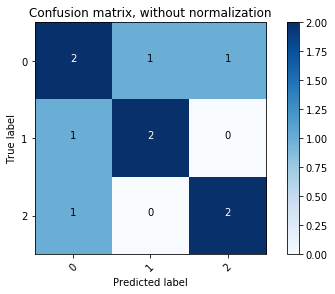

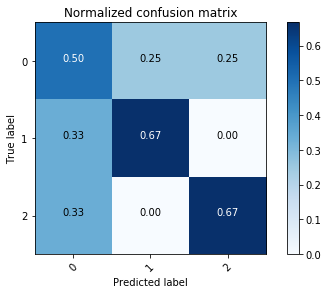

In [57]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2]
cnf_matrix = cm
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Với các bài toán với nhiều lớp dữ liệu, cách biểu diễn bằng màu này rất hữu ích. Các ô màu đậm thể hiện các giá trị cao. Một mô hình tốt sẽ cho một confusion matrix có các phần tử trên đường chéo chính có giá trị lớn, các phần tử còn lại có giá trị nhỏ. Nói cách khác, khi biểu diễn bằng màu sắc, đường chéo có màu càng đậm so với phần còn lại sẽ càng tốt. Từ hai hình trên ta thấy rằng confusion matrix đã chuẩn hoá mang nhiều thông tin hơn. Ta thấy rằng lớp dữ liệu `0` được phân loại không thực sự tốt (ô ở hàng `0`, cột `0` chưa đủ đậm, thực tế chỉ có 50% điểm trong lớp `0` được phân loại đúng). 


## 4. False Alarm, Miss Detection và Receiver operating characteristic curve
Cách đánh giá này thường được áp dụng cho các bài toán phân lớp có hai lớp dữ liệu. Cụ thể hơn, trong hai lớp dữ liệu này có một lớp _nghiêm trọng_ hơn lớp kia và cần được dự đoán chính xác. Ví dụ, trong bài toán xác định có bênh ung thư hay không thì việc không bị _sót_ (miss) quan trọng hơn là việc chẩn đoán nhầm _âm tính_ thành _dương tính_. Trong bài toán xác định có mìn dưới lòng đất hay không thì việc _bỏ sót_ nghiêm trọng hơn việc _báo động nhầm_ rất nhiều. Hay trong bài toán lọc email rác thì việc cho nhầm email quan trọng vào thùng rác nghiêm trọng hơn việc xác định một email rác là email thường. 

Trong những bài toán này, người ta thường định nghĩa lớp dữ liệu _quan trọng_ hơn cần được xác định đúng là lớp _Positive_ (P-dương tính), lớp còn lại được gọi là _Negative_ (N-âm tính). Ta định nghĩa _True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)_ dựa trên _confusion matrix_ như sau: 
```
                  |      Predicted      |      Predicted      |
                  |     as Positive     |     as Negative     |
------------------|---------------------|---------------------|
 Actual: Positive | True Positive (TP)  | False Negative (FN) |
------------------|---------------------|---------------------|
 Actual: Negative | False Positive (FP) | True Negative (TN)  |
------------------|---------------------|---------------------|
```

